homework 9
---
due: June 1 2022

authors: pegler, prüwasser, scheftner

## import libraries ...

... and prepare the data from **tutorial 11**

In [290]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

N = 200

# create covariance matrix and adapt it a bit
M_cov = np.eye(2)
M_cov[0, 1] = 1
M_cov[1, 0] = 1
M_cov[1, 1] = 1
M_cov[0, 0] = 3

# create 3 arrays with different means and stack them
A_1 = np.random.multivariate_normal([-4, 0], M_cov, N)
A_2 = np.random.multivariate_normal([5, 2], M_cov, N)
A_3 = np.random.multivariate_normal([1, 6], M_cov, N)
X = np.vstack((A_1, A_2, A_3))

# create model and fit the data
gm = GaussianMixture(n_components = 3)
gm.fit(X)
pred = gm.predict(X)

## Part 1 

- use the above code to fit a gaussian mixture model to the same data with the number of clusters/components changing from 2 to 8. (all values from 2 to 8 with for loop).
- for each iteration, calculate the model fit measures BIC and AIC
- graph on a single graph, the number of iterations on the X-axis, and both AIC and BIC on the Y axis (with a line for AIC and another for BIC), 
- remember to add axis labels and legends (to see which one is AIC, which is BIC), try to make it look nice, by chaning fontsize, color, linewidth etc. 
- remember AIC and BIC are model fit measures, basedon the log-likelihood, and lower values indicate better model fit

### Lea's solution

In [288]:
N=100
Covar=np.eye(2)
Covar[0,1]=.5
Covar[1,0]=.5
# Means = 

D1=np.random.multivariate_normal([0,1.8],Covar,N)

Covar=np.eye(2)
Covar[0,1]=-.5
Covar[1,0]=-.5


D2=np.random.multivariate_normal([4,2],Covar,N)
D3=np.random.multivariate_normal([.3,-2],Covar,N)
XX=np.vstack((D1,D2,D3))

gm = GaussianMixture(n_components=3)


gm.fit(XX)
print('means\n',gm.means_)
print('\ncovar\n',gm.covariances_)
print('\nscore ',gm.score(XX))   
print('BIC     ',gm.bic(XX))   
print('AIC     ',gm.aic(XX))  

means
 [[ 3.95805606  2.09356475]
 [ 0.15936207 -1.95742035]
 [-0.07435067  1.58513731]]

covar
 [[[ 1.33393443 -0.76553894]
  [-0.76553894  1.15427878]]

 [[ 1.17109607 -0.53955514]
  [-0.53955514  0.97419812]]

 [[ 0.94987727  0.52276425]
  [ 0.52276425  1.17504124]]]

score  -3.765175141526949
BIC      2356.069386985325
AIC      2293.1050849161693


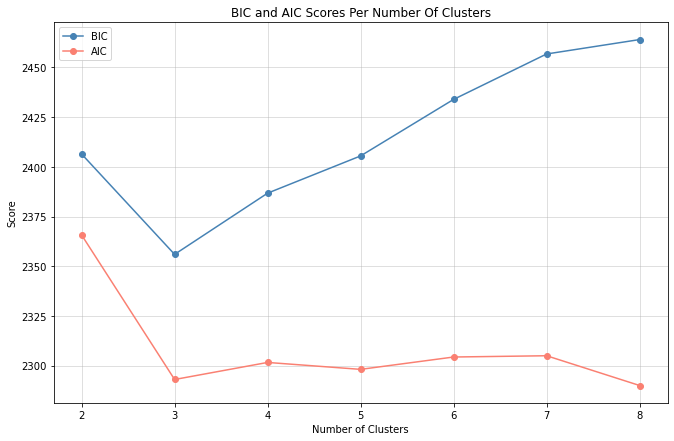

In [289]:
#range of cluster numbers
n_range = range(2,9)

# empty lists to store the BIC and AIC 
bic_score = []
aic_score = []

# Loop through the range and fit  model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(XX)
    
    #Append  BIC and AIC to lists
    bic_score.append(gm.bic(XX))
    aic_score.append(gm.aic(XX))
    

fig, ax = plt.subplots(figsize=(11, 7), nrows=1)
ax.plot(n_range, bic_score,'-o', label = "BIC", c = "steelblue")
ax.plot(n_range, aic_score, '-o', label = "AIC", c = "salmon")
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')
ax.grid(alpha = 0.5)
ax.legend();

#bic favors simple models, usually aic and bic should be similar. thex are meant to be minimized, so pick low spot (6 clusters, or 2?). 
#AIC tends to fit data better

## Part 2: implement k-means with numpy

- number of centroids optional
- intialize the centroids randomly (within the range of the data)
- number of steps optional 
- keep track of distance (distance to closest centroid should descrease)

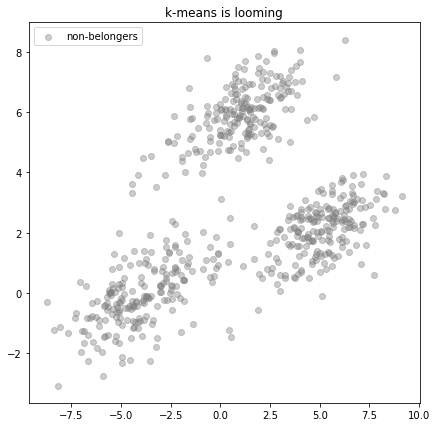

In [291]:
k = 3

cm = ["steelblue", "salmon", "grey", "firebrick", "violet", "goldenrod"]

plt.figure(figsize = (7, 7))
plt.scatter(X[:, 0], X[:, 1], alpha = 0.4, color = "grey", label = "non-belongers")
plt.title("k-means is looming")
plt.legend();

### Functions and initial assignment

In [393]:
def get_centroids(X, k, assigned):
    """computes the coordinates of the centroids"""
    
    centroids = [(X[assigned == i][:, 0].mean(), X[assigned == i][:, 1].mean()) for i in range(1, k + 1)]
    return np.array(centroids)

def assign_cluster(point, centroids):
    """Returns the number of the closest cluster centroid"""
    
    distances = np.sqrt(np.sum((centroids - point)**2, axis = 1))
    return distances.argmin() + 1

def get_distances(point, centroids):
    """Returns the distance to the closest cluster centroid"""
    
    distances = np.sqrt(np.sum((centroids - point)**2, axis = 1))
    return distances.min()


# inital values
np.random.seed(0)
assigned = np.random.randint(1, k + 1, len(X))
centroids = get_centroids(X, k, assigned)
mean_distance = np.mean(get_distances(point, centroids))
mean_distances = []
j = 0 # iteration index

### Compute centroids and make assignments

Run this cell repeatedly to see the clusters changing

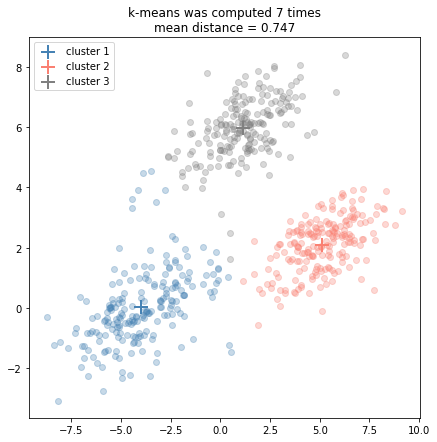

In [403]:
plt.figure(figsize = (7, 7))

for i in range(1, k + 1):
    plt.scatter(X[assigned == i][:, 0], X[assigned == i][:, 1], alpha = 0.3, color = cm[i-1])
    plt.scatter(centroids[i - 1, 0], centroids[i - 1, 1], marker ="+", s = 180, color = cm[i-1], linewidths = 2, label = f"cluster {i}")

plt.legend()
plt.title(f"k-means was computed {j} times\nmean distance = {mean_distance:,.3f}")

# assign again
assigned = np.array([assign_cluster(point, centroids) for point in X])
centroids = get_centroids(X, k, assigned)
mean_distance = np.mean(get_distances(point, centroids))
mean_distances.append(mean_distance)

# increment
j += 1

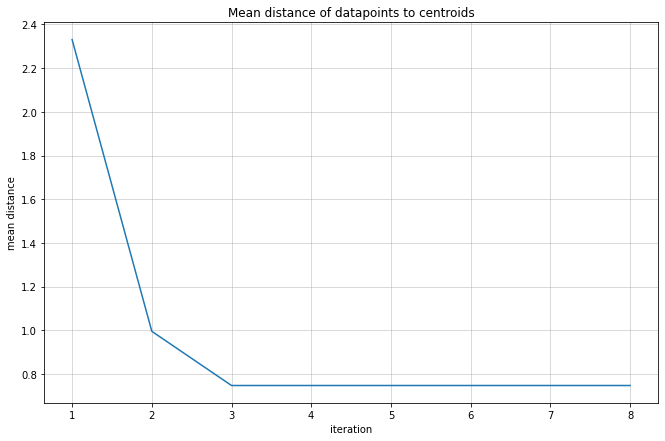

In [407]:
plt.figure(figsize = (11, 7))

plt.plot(np.arange(1, len(mean_distances) + 1), mean_distances)

plt.xlabel("iteration")
plt.ylabel("mean distance")
plt.title(f"Mean distance of datapoints to centroids")
plt.grid(alpha = 0.6)